# Importing modules and data

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
data = pd.read_csv("/kaggle/input/housing-price-prediction/Housing.csv")

In [77]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [79]:
data.describe(include='O')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


# Basic Data Preprocessing

In [80]:
for i in data.columns:
    if(data[i].dtypes == 'object'):
        unique_dict = dict()
        lst = data[i].unique()
        for j in range(len(lst)):
            unique_dict[lst[j]] = j
        data[i] = data[i].replace(unique_dict)

/tmp/ipykernel_35/359127001.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[i] = data[i].replace(unique_dict)


In [81]:
for i in ['area', 'price']:
    data[i] = (data[i]-data[i].mean())/data[i].std()

In [82]:
X = data.drop(['price'], axis = 1)
Y = data['price']


In [83]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.045766,4,2,3,0,0,0,0,0,2,0,0
1,1.755397,4,4,4,0,0,0,0,0,3,1,0
2,2.216196,3,2,2,0,0,1,0,1,2,0,1
3,1.082630,4,2,2,0,0,1,0,0,3,0,0
4,1.045766,4,1,2,0,1,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.990968,2,1,1,0,0,1,0,1,2,1,2
541,-1.267448,3,1,1,1,0,0,0,1,0,1,1
542,-0.705273,2,1,1,0,0,0,0,1,0,1,2
543,-1.032440,3,1,1,1,0,0,0,1,0,1,0


In [84]:
Y

0      4.562174
1      4.000809
2      4.000809
3      3.982096
4      3.551716
         ...   
540   -1.575421
541   -1.603676
542   -1.612845
543   -1.612845
544   -1.612845
Name: price, Length: 545, dtype: float64

# Train-Test-Split and Training the Model

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [93]:
LinReg = LinearRegression()
LinReg.fit(X_train, Y_train)

LinearRegression()

In [120]:
print("Coefficients are:",LinReg.coef_)

Coefficients are: [ 0.29732226  0.08347779  0.50576441  0.24665774 -0.20589587  0.20507205
  0.18759754  0.42826953 -0.40909155  0.16570494 -0.30872819 -0.1012713 ]


In [122]:
print("Intercept is:",LinReg.intercept_)

Intercept is: -0.9010202818514528


# Metrics

In [96]:
prediction = LinReg.predict(X_test)

In [97]:
print("Mean Absolute Error:",mean_absolute_error(prediction, Y_test))
print("Mean Squared Error:",mean_squared_error(prediction, Y_test))
print("R2 Score:",r2_score(prediction, Y_test))

Mean Absolute Error: 0.3577885719974099
Mean Squared Error: 0.23649138131933478
R2 Score: 0.6367387283066841


Text(0.5, 1.0, 'Predicted v/s True Labels')

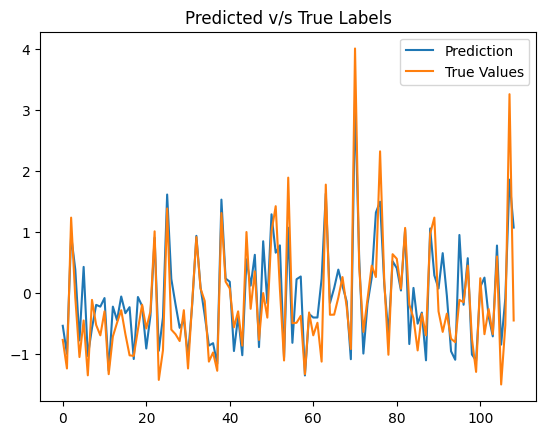

In [123]:
plt.plot(prediction)
plt.plot(list(Y_test))
plt.legend(['Prediction', 'True Values'])
plt.title("Predicted v/s True Labels")